# Projeto de Aprendizagem de Máquina - 2025.1

**Centro de Informática - Universidade Federal de Pernambuco**

Alunos:

- Getúlio Junqueira de Queiroz Lima (gjql@cin.ufpe.br)

- Maria Beatriz Martins Pontes Gonçalo (mbmpg@cin.ufpe.br)

- Rodrigo Rocha Moura (rrm2@cin.ufpe.br)

- Victor Gabriel de Carvalho (vgc3@cin.ufpe.br)

- Vinicius Gabriel Lopes Santos (vgls@cin.ufpe.br)

Descrição do Projeto:

Aplicação dos modelos **Árvore de Decisão**, **Naive Bayes**, **Regressão Logística** e **K-vizinhos** sobre a base de dados [*Breast Cancer Wisconsin (Diagnostic)*](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic).

---

In [ ]:
%pip install ucimlrepo -q

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import (
    classification_report, confusion_matrix,
    accuracy_score, f1_score, precision_score, recall_score,
    make_scorer
)

from ucimlrepo import fetch_ucirepo

random_seed = 9
np.random.seed(random_seed)

## Dataset



O câncer de mama é uma das doenças mais comuns e desafiadoras enfrentadas pela saúde pública globalmente. O diagnóstico precoce é crucial para aumentar as chances de sucesso no tratamento e melhorar os resultados para os pacientes. Métodos tradicionais de diagnóstico, como exames de imagem e biópsias, são essenciais, mas a incorporação de ferramentas de aprendizado de máquina pode auxiliar os médicos na análise de dados complexos e na identificação de padrões sutis que podem indicar a malignidade de uma massa mamária. Esse tipo de abordagem vem ganhando espaço com o passar do tempo.

Apesar de ser bastante antigo (disponibilizado em 1995), esse dataset é amplamente utilizado na comunidade de pesquisa em aprendizado de máquina para tarefas de classificação devido às suas características:

- **Dados Reais:** As features são extraídas de imagens digitalizadas de punções aspirativas por agulha fina (FNA), um procedimento médico real. Isso confere ao projeto um contexto prático e a possibilidade de aplicar os modelos a dados que refletem um cenário do mundo real.
- **Problema de Classificação Binária:** O objetivo de classificar massas mamárias como benignas ou malignas é um problema clássico de classificação binária, permitindo a aplicação e comparação de diversos algoritmos de aprendizado supervisionado.
- **Qualidade dos Dados:** O dataset é relativamente limpo, com ausência de valores ausentes e duplicados, o que facilita a fase de pré-processamento e permite focar na modelagem e avaliação.
- **Benchmark:** Sendo um dataset conhecido e utilizado em diversas pesquisas, ele serve como um bom benchmark para comparar o desempenho dos modelos implementados com resultados já estabelecidos na literatura.

O conjunto de dados contém características extraídas de imagens digitalizadas de Punção Aspirativa por Agulha Fina (Fine-needle aspiration) de massas mamárias. As features descrevem propriedades dos núcleos celulares presentes nas amostras. Ao total, temos 568 amostras com 30 features cada. Nas seções a seguir, as componentes o dataset seão detalahdas de forma mais aprofundada.

In [ ]:
df = fetch_ucirepo(id=17)
features = df.data.features
target = df.data.targets

In [ ]:
features.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


---

### Features

As features foram obtidas a partir de uma imagem digitalizada de uma punção aspirativa por agulha fina (FNA) de uma massa mamária. Elas descrevem as características dos núcleos celulares presentes na imagem. Essas características serão usadas pelos modelos para classificar as massas mamárias como benignas ou malignas

Especificamente, o processo de obtenção dessas features envolve:

- Punção Aspirativa por Agulha Fina: Um procedimento médico minimamente invasivo onde uma agulha fina é usada para coletar uma pequena amostra de células de uma massa mamária suspeita.

- Cálculo das Features: A partir desta imagem digitalizada, algoritmos de processamento de imagem são aplicados para extrair características quantitativas dos núcleos celulares visíveis. Estas características incluem medidas como raio, textura, perímetro, área, suavidade, compacidade, concavidade, pontos côncavos, simetria e dimensão fractal.

Note que as informações no dataset não são as imagens em si, mas sim valores numéricos que representam as propriedades morfológicas dos núcleos celulares, consideradas relevantes para distinguir entre células benignas e malignas. As features obtidas estão divididas em 3 dimensões e descrevem as seguintes propriedades dos núcleos celulares:

- *radius*: a média das distâncias entre o centro e a circunferência do núcleo celular;

- *texture*: o desvio padrão dos valores da escala de cinza do núcleo celular;

- *perimeter*: circunferência do núcleo celular;

- *area*: área do núcleo celular;

- *smoothness*: variação local do núcleo celular medida em comprimentos do raio (*radius*);

- *compactness*: $\frac{perimeter^{2}}{(area-1)}$;

- *concavity*: a profundidade de seções côncavas presentes no perímetro do núcleo celular;

- *concave points*: a quantidade de seções côncavas presentes no perímetro do núcleo celular;

- *symmetry*: a simetria do núcleo celular;

- *fractal dimension*: aproximação do contorno - $1$.

Todas as features são variáveis com valores reais ($\rm I\!R$).

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [ ]:
features.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


---

### Target

A variável target é o diagnóstico de câncer de mama respectivo à massa mamária analisada. Ou seja,

- *Diagnosis* $=$ M indica que o tumor presente nesta mama é maligno;

- *Diagnosis* $=$ B indica que o tumor presente nesta mama é benigno.

In [ ]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Diagnosis  569 non-null    object
dtypes: object(1)
memory usage: 4.6+ KB


No trecho abaixo, é verificado se as classes do alvo estão balanceadas, contando quantos exemplos há de cada categoria.

In [ ]:
class_counts = target['Diagnosis'].value_counts()
print("Distribuição da variável target:")
print(class_counts)

Distribuição da variável target:
Diagnosis
B    357
M    212
Name: count, dtype: int64


---

### Tratamento de Dados

Uma vez descrito o contexto do problema, podemos tratar os dados. Esta é uma etapa crucial em qualquer projeto de aprendizado de máquina, pois a qualidade dos dados de entrada impacta diretamente o desempenho dos modelos.

Os primeiros passos no tratamento de dados, como visto nos códigos seguintes, geralmente envolvem verificar e lidar com problemas comuns nos conjuntos de dados:

- Verificação de valores ausentes (Missing Values): A presença de valores ausentes pode causar erros ou vieses nos modelos, além de gerar erros de execução na maioria das bibliotecas.

- Verificação de linhas duplicadas: Linhas duplicadas podem inflar artificialmente o tamanho do dataset e levar a resultados superestimados durante o treinamento e avaliação do modelo.

- Análise de correlação: É fundamental para entender a relação entre as diferentes features pois permitem identificar o grau de dependência linear entre os pares de variáveis. Uma alta correlação entre duas features pode indicar redundância e levar a problemas de multicolinearidade em alguns modelos.

- Codificação das informações: A etapa de codificação das informações é necessária porque a maioria dos modelos de machine learning trabalham apenas com dados numéricos.

- Separação dos dados: Antes de treinar os modelos, é crucial dividir o dataset em subconjuntos para garantir uma avaliação justa do desempenho do modelo.

- Normalização: Alguns modelos de machine learning, como Regressão Logística e K-Vizinhos, são sensíveis à escala das features.


O [site do banco de dados](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) diz que não há valores vazios. Entretanto, vale a pena verificarmos isso:

In [ ]:
features.isnull().sum().sum()

np.int64(0)

In [ ]:
target.isnull().sum()

,0
Diagnosis,0


A partir dos prints acima, vemos que tanto em *features* como em *target* temos nenhum *missing value*.

Checando se há linhas duplicadas:

In [ ]:
pd.concat([features, target], axis=1).duplicated().sum()

np.int64(0)

Como vemos pelo print acima, não há linhas duplicadas.

---

Como ja introduzido, o próximo passo é a análise de correlação. Aqui buscamos identificar pares de variáveis que apresentam alta correlação. Variáveis altamente correlacionadas são variáveis que trazem informações redundantes, o que pode afetar negativamente a performance do modelo devido à multicolinearidade.

Antes de vermos a matriz de correlação, podemos supor que há uma alta correlação entre as variáveis *radius*, *perimeter* e *area* porque são características físicas do núcleo celular e, portanto, naturalmente relacionadas entre si.

Além disso, podemos supor que há alta correlação entre as 3 dimensões da mesma variável (ex.: *radius1*, *radius2* e *radius3*).

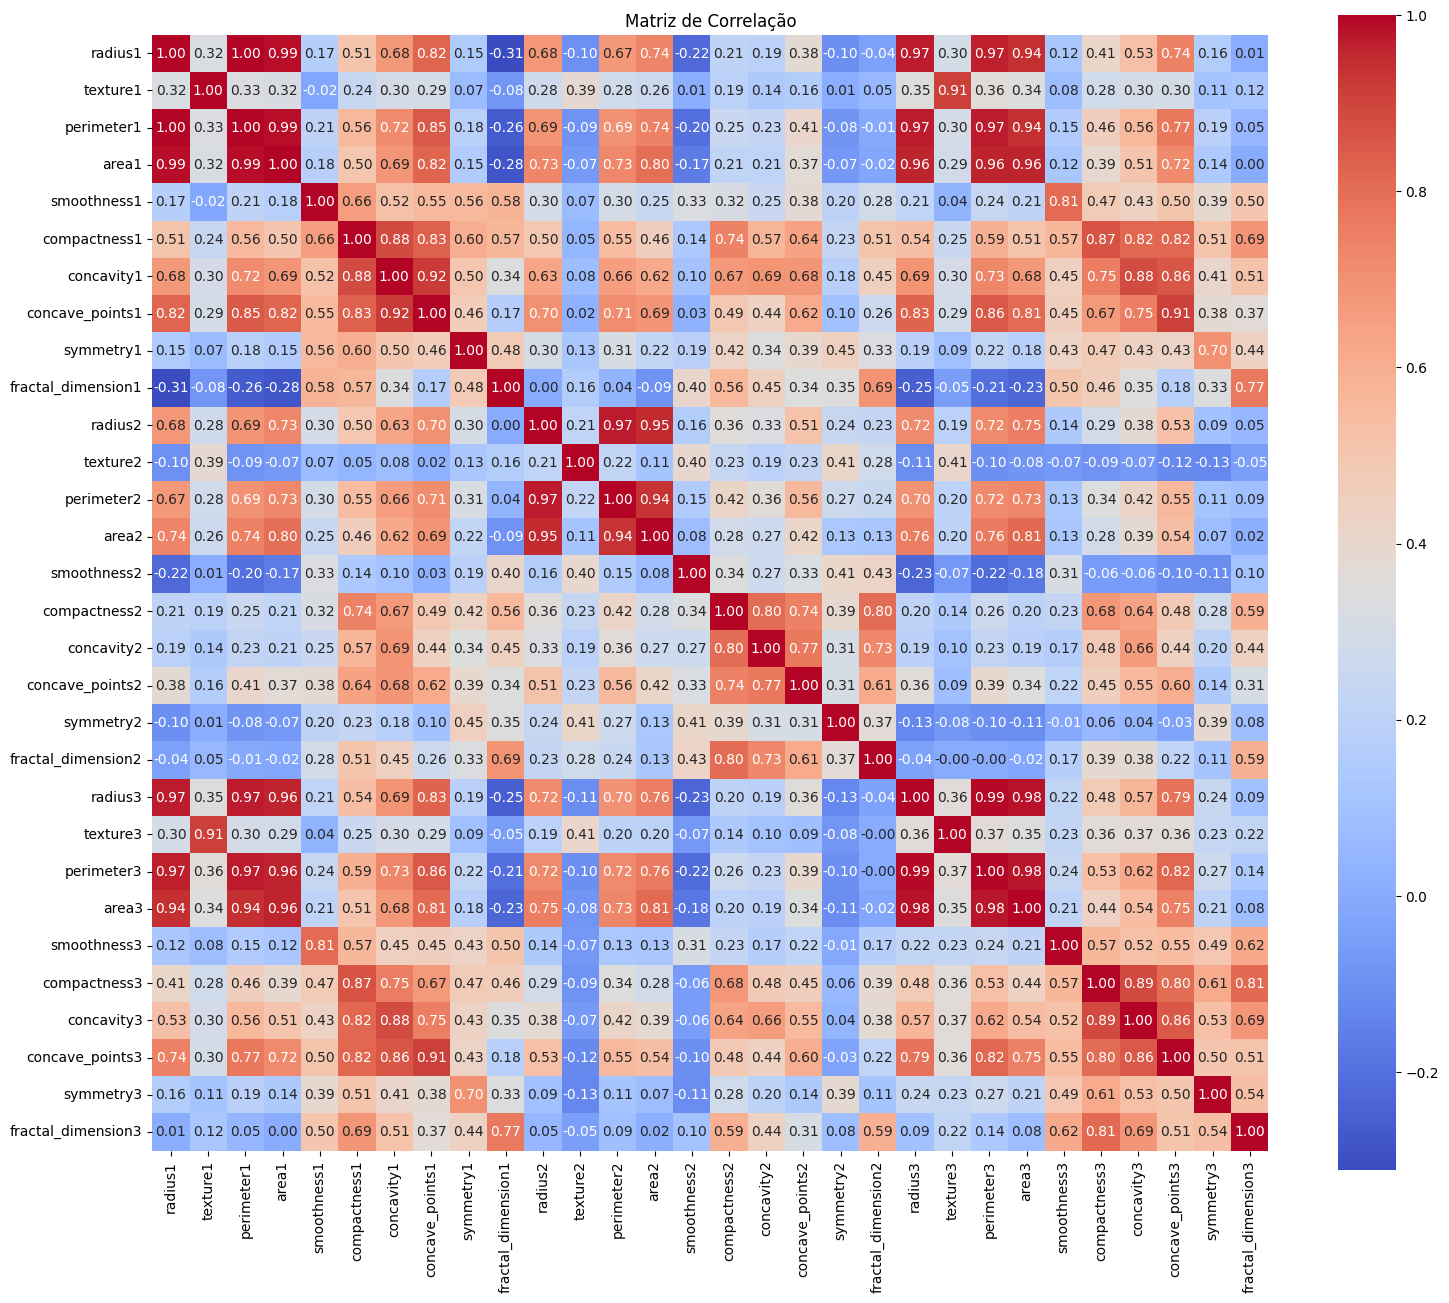

In [ ]:
correlation_matrix = features.corr()
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Matriz de Correlação")
plt.show()

A matriz de correlação acima traz alguns resultados interessantes:

- Como esperado, vemos altíssima correlação entre as variáveis *radius*, *perimeter* e *area*. Esse comportamento acontece nas 3 dimensões;

- Não há alta correlação negativa, pois o valor mais negativo encontrado do coeficiente de correlação foi apenas -0.31;

- A correlação não é tão generalizada ao longo das 3 dimensões, por exemplo, *concave_points1* tem uma altíssima correlação de 0.91 com *concave_points3*. Entretanto, possui somente 0.62 de correlação com *concave_points2*.

Após a análise das correlações, decidimos remover as *features* que possuem correlação acima de 0.8. Assim, vamos aplicar os modelos tanto no banco de dados original como no que removemos essas correlações, a fim de compararmos os resultados.

In [ ]:
abs_correlation_matrix = correlation_matrix.abs()

stacked_corr = abs_correlation_matrix.stack()
sorted_corr = stacked_corr.sort_values(ascending=False)

sorted_corr = sorted_corr[sorted_corr.index.get_level_values(0) != sorted_corr.index.get_level_values(1)]

print("Most correlated features (descending order of absolute correlation):")
print(sorted_corr.head(15))

Most correlated features (descending order of absolute correlation):
perimeter1  radius1       0.997855
radius1     perimeter1    0.997855
radius3     perimeter3    0.993708
perimeter3  radius3       0.993708
radius1     area1         0.987357
area1       radius1       0.987357
            perimeter1    0.986507
perimeter1  area1         0.986507
area3       radius3       0.984015
radius3     area3         0.984015
area3       perimeter3    0.977578
perimeter3  area3         0.977578
radius2     perimeter2    0.972794
perimeter2  radius2       0.972794
perimeter3  perimeter1    0.970387
dtype: float64


In [ ]:
# Find features with correlation > 0.8 (excluding self-correlation)
high_corr_features = set()
for i in range(len(abs_correlation_matrix.columns)):
    for j in range(i):
        if abs_correlation_matrix.iloc[i, j] > 0.8:
            colname_i = abs_correlation_matrix.columns[i]
            colname_j = abs_correlation_matrix.columns[j]
            high_corr_features.add(colname_j)

print("Features with absolute correlation > 80% with at least one other feature:")
print(high_corr_features)

# Drop the identified highly correlated features
features_corr_fix = features.drop(columns=list(high_corr_features), inplace=False)

features_corr_fix.head()

Features with absolute correlation > 80% with at least one other feature:
{'radius2', 'concave_points1', 'concavity1', 'compactness1', 'perimeter2', 'area2', 'area1', 'concavity3', 'texture1', 'smoothness1', 'radius3', 'compactness3', 'perimeter1', 'perimeter3', 'radius1', 'compactness2'}


,symmetry1,fractal_dimension1,texture2,smoothness2,concavity2,concave_points2,symmetry2,fractal_dimension2,texture3,area3,smoothness3,concave_points3,symmetry3,fractal_dimension3
0,0.2419,0.07871,0.9053,0.006399,0.05373,0.01587,0.03003,0.006193,17.33,2019.0,0.1622,0.2654,0.4601,0.11890
1,0.1812,0.05667,0.7339,0.005225,0.01860,0.01340,0.01389,0.003532,23.41,1956.0,0.1238,0.1860,0.2750,0.08902
2,0.2069,0.05999,0.7869,0.006150,0.03832,0.02058,0.02250,0.004571,25.53,1709.0,0.1444,0.2430,0.3613,0.08758
3,0.2597,0.09744,1.1560,0.009110,0.05661,0.01867,0.05963,0.009208,26.50,567.7,0.2098,0.2575,0.6638,0.17300
4,0.1809,0.05883,0.7813,0.011490,0.05688,0.01885,0.01756,0.005115,16.67,1575.0,0.1374,0.1625,0.2364,0.07678


---

Além disso, os modelos em questão (Árvore de Decisão, Naive Bayes, Regressão Logística e K-vizinhos) são projetados para operar com números. Então, devemos trocar as labels da variável target para:

- *Diagnosis* $=$ M $\rightarrow$ *Diagnosis* $=$ 1

- *Diagnosis* $=$ B $\rightarrow$ *Diagnosis* $=$ 0

Aplicando o mapeamento:

In [ ]:
le = LabelEncoder()
numeric_target = le.fit_transform(target['Diagnosis'].values.ravel())
numeric_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

---

Também precisamos particionar (**de maneira aleatória e estratificada**) os dados em conjuntos de treinamento, validação e teste.

Particionando em:

- 30% de teste;

- 70% de treinamento + validação.

In [ ]:
train_and_valid_features, test_features, train_and_valid_target, test_target = train_test_split(
    features,
    numeric_target,
    test_size = 0.3,
    random_state = 42,
    stratify=numeric_target
)

train_and_valid_features_corr_fix, test_features_corr_fix, train_and_valid_target_corr_fix, test_target_corr_fix = train_test_split(
    features_corr_fix,
    numeric_target,
    test_size = 0.3,
    random_state = 42,
    stratify=numeric_target
)

Entretanto, a Regressão Logística e o K-Vizinhos são modelos sensíveis a scaling, ou seja, temos que aplicar um scaler (normalizador de dados) nas features. Este scaler transforma as features para que fiquem em uma escala entre 0 e 1

Aplicando o scaler nas features:

In [ ]:
scaler = MinMaxScaler()

normalized_train_and_valid_features = scaler.fit_transform(train_and_valid_features)
normalized_test_features = scaler.transform(test_features)
normalized_train_and_valid_features_corr_fix = scaler.fit_transform(train_and_valid_features_corr_fix)
normalized_test_features_corr_fix = scaler.transform(test_features_corr_fix)

Essas etapas de tratamento de dados preparam o dataset de forma adequada para a fase posterior de treinamento e avaliação dos diferentes modelos de aprendizado de máquina.

A segur, faremos busca por hiperparâmetros e a avaliação dos modelos.

---

## Busca por Hiper-parâmetros

Após a preparação dos dados, o próximo passo crucial é a otimização dos modelos através da busca por hiper-parâmetros. Diferentemente dos parâmetros do modelo que são aprendidos durante o treinamento (como os pesos em uma Regressão Logística), os hiper-parâmetros são definidos antes do processo de treinamento e controlam o comportamento do algoritmo de aprendizado. Exemplos incluem a profundidade máxima de uma Árvore de Decisão, o número de vizinhos no K-Vizinhos, ou a força da regularização na Regressão Logística.

A escolha adequada dos hiper-parâmetros é fundamental para garantir que o modelo generalize bem para dados não vistos e evite problemas como overfitting (quando o modelo se ajusta muito bem aos dados de treinamento, mas falha em novos dados) ou underfitting (quando o modelo é muito simples para capturar os padrões nos dados).

Nesta seção, utilizaremos técnicas de busca e validação cruzada, como o GridSearchCV, para explorar diferentes combinações de hiper-parâmetros para cada um dos modelos selecionados: Árvore de Decisão, Naive Bayes, Regressão Logística e K-vizinhos. O objetivo é identificar a combinação de hiper-parâmetros que resulta no melhor desempenho do modelo, avaliado por métricas relevantes para o problema em questão (como F1-score, que você já definiu como métrica de referência na busca).

In [ ]:
# Espaço de parâmetros para o DecisionTreeClassifier
param_grid_dt = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20, 25, 30],
    'max_features': ['sqrt', 'log2', None, 0.5, 0.8],
    'ccp_alpha': [0.0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2]
}

# Espaço de parâmetros para o GaussianNB
param_grid_gnb = {
    'var_smoothing': [1e-11, 1e-10, 1e-9, 1e-8, 1e-7]
}

# Espaço de parâmetros para o LogisticRegression
param_grid_lr = [
    {'penalty': ['l2', None], 'solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
     'tol': [1e-4, 1e-3, 1e-2], 'fit_intercept': [True, False], 'max_iter': [100, 200, 300]},
    {'penalty': ['l1', 'l2'], 'solver': ['liblinear'],
     'tol': [1e-4, 1e-3, 1e-2], 'fit_intercept': [True, False], 'max_iter': [100, 200, 300]},
    {'penalty': ['elasticnet'], 'solver': ['saga'], 'l1_ratio': [0.2, 0.5, 0.8],
     'tol': [1e-4, 1e-3, 1e-2], 'fit_intercept': [True, False], 'max_iter': [100, 200, 300]}
]

# Espaço de parâmetros para o KNeighborsClassifier
param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
    'algorithm': ['auto', 'brute', 'ball_tree', 'kd_tree'],
    'weights': ['distance', 'uniform'],
    'metric': ['euclidean']
}

grid_search_scores = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score),
    'f1': make_scorer(f1_score)}

### Validação Cruzada

A **validação cruzada (cross-validation)** é uma técnica essencial em aprendizado de máquina para avaliar a performance de um modelo de forma mais robusta e evitar *overfitting*. Em vez de dividir o dataset em apenas um conjunto de treinamento e um conjunto de teste, a validação cruzada divide o dataset em múltiplos "folds" (partições).

No método k-fold cross-validation (onde 'k' é o número de folds, geralmente 5 ou 10), o dataset é dividido em k subconjuntos de tamanho aproximadamente igual. O processo de treinamento e avaliação é repetido k vezes. Em cada iteração:

1.  Um dos folds é usado como **conjunto de validação**.
2.  Os folds restantes (k-1) são usados como **conjunto de treinamento**.
3.  O modelo é treinado no conjunto de treinamento e avaliado no conjunto de validação.

Ao final das k iterações, obtém-se k resultados de performance (uma para cada fold usado como validação). A performance final do modelo é geralmente a média desses k resultados.

A validação cruzada fornece uma estimativa mais confiável de como o modelo se comportará em dados não vistos, reduzindo a dependência de uma única divisão treino/teste. Além de proporcionar um melhor uso de datasets pequenos.

---

### Árvore de Decisão

Uma Árvore de Decisão (Decision Tree) é um modelo de aprendizado de máquina supervisionado que é utilizado para tarefas de classificação e regressão. Ela se assemelha a um fluxograma, onde cada nó interno representa um teste em um atributo (feature), cada ramo representa o resultado do teste, e cada folha (nó terminal) representa a classe ou o valor predito.

O processo de construção de uma árvore de decisão envolve dividir recursivamente o dataset com base nos atributos que melhor separam os dados nas diferentes classes ou valores. A divisão é escolhida para maximizar a pureza dos nós resultantes, ou seja, para que os exemplos em cada nó folha pertençam o máximo possível a uma única classe (em classificação) ou tenham valores próximos (em regressão).

Apesar de serem fáceis de interpretar e não precisarem de grandes codificaçõe, elas podem ser propensas a overfitting, especialmente árvores profundas, e serem sensiveis a variações nos dados.

Os hiper-parâmetros do *DecisionTreeClassifier* (Árvore de Decisão) escolhidos para sofrerem variações foram:

- ***criterion***: Função que mede a qualidade de uma divisão. As opções comuns ('gini' e 'entropy') influenciam como a árvore encontra os melhores pontos de divisão para separar as classes. 'log_loss' é outra opção que pode ser explorada. Variar este parâmetro nos ajuda a determinar qual critério de impureza resulta em melhores divisões para este dataset.

- ***splitter***: A estratégia utilizada para a escolha de uma divisão em cada nó. 'best' considera todas as features e escolhe a melhor divisão, enquanto 'random' seleciona um subconjunto aleatório de features. Experimentar diferentes estratégias de divisão pode impactar a velocidade e a qualidade das divisões, potencialmente levando a árvores mais eficientes ou robustas.

- ***max_depth***: A profundidade máxima da árvore de decisão. Controlar a profundidade é crucial para evitar o overfitting. Uma árvore muito profunda pode memorizar os dados de treinamento, enquanto uma árvore muito rasa pode não capturar padrões complexos. Variar 'max_depth' (incluindo 'None' para profundidade ilimitada) nos permite encontrar a complexidade estrutural ideal para a árvore.

- ***max_features***: O número máximo de features a serem consideradas na escolha da divisão. Limitar o número de features por divisão pode ajudar a reduzir a variabilidade do modelo e protegê-lo contra o overfitting, especialmente em datasets com muitas features correlacionadas. As opções incluem o número total ('None'), a raiz quadrada do número de features ('sqrt'), o logaritmo base 2 do número de features ('log2') ou frações do total (como 0.5 e 0.8).

- ***ccp_alpha***: Parâmetro utilizado no algoritmo de poda *Minimal Cost-Complexity Pruning*. A poda é uma técnica para simplificar a árvore após o treinamento, removendo ramos que não contribuem significativamente para a redução da impureza. Variar 'ccp_alpha' nos permite controlar a quantidade de poda, buscando uma árvore mais generalizável.

In [ ]:
grid_decision_tree = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=random_seed),
    param_grid=param_grid_dt,
    cv=5,
    scoring=grid_search_scores,
    refit = 'f1',
    n_jobs=-1,
    verbose=1
)

grid_decision_tree.fit(train_and_valid_features, train_and_valid_target)

Fitting 5 folds for each of 1470 candidates, totalling 7350 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=9), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 10, 15, 20, 25, 30],
                         'max_features': ['sqrt', 'log2', None, 0.5, 0.8],
                         'splitter': ['best', 'random']},
             refit='f1',
             scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                      'f1': make_scorer(f1_score, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict')},
             verbose=1)

Os cinco melhores parâmetros (com relação ao F1-Score) podem ser vistos abaixo:

In [ ]:
pd.DataFrame(
    grid_decision_tree.cv_results_
)[['params', 'mean_test_recall', 'mean_test_precision', 'mean_test_f1']].sort_values(by='mean_test_f1', ascending=False).head()

,params,mean_test_recall,mean_test_precision,mean_test_f1
439,"{'ccp_alpha': 0.005, 'criterion': 'gini', 'max...",0.925747,0.971921,0.947971
326,"{'ccp_alpha': 0.001, 'criterion': 'entropy', '...",0.938391,0.946256,0.941835
336,"{'ccp_alpha': 0.001, 'criterion': 'entropy', '...",0.938391,0.946256,0.941835
356,"{'ccp_alpha': 0.001, 'criterion': 'log_loss', ...",0.938391,0.946256,0.941835
346,"{'ccp_alpha': 0.001, 'criterion': 'entropy', '...",0.938391,0.946256,0.941835


In [ ]:
print("Melhores parâmetros encontrados para DecisionTreeClassifier:")
print(grid_decision_tree.best_params_)
print(f"F1-Score para os melhores parâmetros: {grid_decision_tree.best_score_}")

Melhores parâmetros encontrados para DecisionTreeClassifier:
{'ccp_alpha': 0.005, 'criterion': 'gini', 'max_depth': 5, 'max_features': 0.8, 'splitter': 'random'}
F1-Score para os melhores parâmetros: 0.9479713310160263


In [ ]:
best_decision_tree = grid_decision_tree.best_estimator_

In [ ]:
grid_decision_tree.fit(train_and_valid_features_corr_fix, train_and_valid_target_corr_fix)

print("\nMelhores parâmetros encontrados para DecisionTreeClassifier com o dataset reduzido:")
print(grid_decision_tree.best_params_)
print(f"F1-Score para os melhores parâmetros com o dataset reduzido: {grid_decision_tree.best_score_}")

best_decision_tree_corr_fix = grid_decision_tree.best_estimator_

Fitting 5 folds for each of 1470 candidates, totalling 7350 fits

Melhores parâmetros encontrados para DecisionTreeClassifier com o dataset reduzido:
{'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'splitter': 'best'}
F1-Score para os melhores parâmetros com o dataset reduzido: 0.921958504791229


---

### Naive Bayes Gaussiano

Naive Bayes é uma família de algoritmos de classificação probabilística simples, baseados na aplicação do teorema de Bayes com a suposição "ingênua" (naive) de independência forte entre os pares de features, dado o valor da variável de classe. Apesar dessa suposição simplificadora, os classificadores Naive Bayes as vezes performam bem em muitos problemas do mundo real.

O Naive Bayes Gaussiano é uma variante específica do Naive Bayes que é utilizada quando as features contínuas são assumidas como seguindo uma distribuição Gaussiana (Normal) condicionalmente para cada classe.

Apesar de ser rápido para treinar e fazer previsões e não precisar de muitos dados para treinamento, a suposição de independência entre as features raramente é verdadeira na prática, o que pode limitar sua performance em alguns datasets.

Na biblioteca escolhida (sklearn) não há muitos hiper-parâmetros para o *GaussianNB* (Naive Bayes Gaussiano). Iremos apenas avaliar sua performance nas duas versões do dataset e para diferentes 'var_smoothing'. A motivação para usar o 'var_smoothing' é evitar que a variância de uma feature se torne zero. Se a variância de uma feature for zero em um determinado grupo (classe), isso significa que todos os exemplos desse grupo têm o mesmo valor para essa feature.

In [ ]:
grid_naive_bayes = GridSearchCV(
    estimator=GaussianNB(),
    param_grid=param_grid_gnb,
    cv=5,
    scoring=grid_search_scores,
    refit = 'f1',
    n_jobs=-1,
    verbose=1
)

grid_naive_bayes.fit(train_and_valid_features, train_and_valid_target)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-11, 1e-10, 1e-09, 1e-08, 1e-07]},
             refit='f1',
             scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                      'f1': make_scorer(f1_score, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict')},
             verbose=1)

Os cinco melhores parâmetros (com relação ao F1-Score) podem ser vistos abaixo:

In [ ]:
pd.DataFrame(
    grid_naive_bayes.cv_results_
)[['params', 'mean_test_recall', 'mean_test_precision', 'mean_test_f1']].sort_values(by='mean_test_f1', ascending=False).head()

,params,mean_test_recall,mean_test_precision,mean_test_f1
2,{'var_smoothing': 1e-09},0.898161,0.938839,0.916301
0,{'var_smoothing': 1e-11},0.898161,0.919154,0.907053
1,{'var_smoothing': 1e-10},0.898161,0.919154,0.907053
3,{'var_smoothing': 1e-08},0.864598,0.942519,0.900898
4,{'var_smoothing': 1e-07},0.844138,0.952615,0.894513


In [ ]:
print("Melhores parâmetros encontrados para GaussianNB:")
print(grid_naive_bayes.best_params_)
print(f"F1-Score para os melhores parâmetros: {grid_naive_bayes.best_score_}")

Melhores parâmetros encontrados para GaussianNB:
{'var_smoothing': 1e-09}
F1-Score para os melhores parâmetros: 0.9163013829532307


In [ ]:
best_naive_bayes = grid_naive_bayes.best_estimator_

In [ ]:
grid_naive_bayes.fit(train_and_valid_features_corr_fix, train_and_valid_target_corr_fix)

print("\nMelhores parâmetros encontrados para GaussianNB com o dataset reduzido:")
print(grid_naive_bayes.best_params_)
print(f"F1-Score para os melhores parâmetros com o dataset reduzido: {grid_naive_bayes.best_score_}")

best_naive_bayes_corr_fix = grid_naive_bayes.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits

Melhores parâmetros encontrados para GaussianNB com o dataset reduzido:
{'var_smoothing': 1e-08}
F1-Score para os melhores parâmetros com o dataset reduzido: 0.9507365952457094


---

### Regressão Logística

A Regressão Logística é um algoritmo de classificação linear usado para prever a probabilidade de uma instância pertencer a uma classe específica. Apesar do nome "Regressão", é um modelo de classificação. Ele funciona ajustando uma função logística (ou sigmoide) aos dados para produzir uma saída entre 0 e 1, que representa a probabilidade da classe positiva. Essa probabilidade é então convertida em uma previsão de classe (0 ou 1) usando um limiar (geralmente 0.5). É um modelo simples, eficiente e amplamente utilizado, especialmente para problemas de classificação binária

Os hiper-parâmetros do *LogisticRegression* (Regressão Logística) escolhidos para variar foram:

- *penalty*: Tipo de penalidade aplicada. A penalidade (L1 ou L2) é usada para regularização, o que ajuda a prevenir o overfitting ao adicionar um custo aos coeficientes do modelo. Variar este parâmetro nos permite encontrar a melhor forma de regularizar o modelo para este dataset.

- *tol*: Tolerância para o critério de parada. Este parâmetro determina o quão estrito é o critério para o algoritmo de otimização parar. Ajustar a tolerância pode influenciar a precisão da solução encontrada e o tempo de treinamento.

- *fit_intercept*: Parâmetro booleano que decide se uma constante deve ser adicionada ou não à função de decisão. Incluir uma interceptação permite que a linha de decisão se desloque, o que pode ser importante se os dados não estiverem centrados na origem.

- *solver*: Algoritmo utilizado no problema de otimização. Diferentes solvers (como 'lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga') são mais adequados para diferentes tipos de dados e penalidades. Experimentar diferentes solvers nos ajuda a encontrar o método mais eficiente e robusto para convergir para a solução ótima.

- *max_iter*: Número máximo de iterações para o *solver* convergir. Em alguns casos, o solver pode precisar de mais iterações para encontrar a solução ideal, especialmente com datasets grandes ou com alta dimensionalidade. Aumentar *max_iter* pode ajudar na convergência, mas também aumenta o tempo de treinamento.

In [ ]:
grid_logistic_regression = GridSearchCV(
    estimator=LogisticRegression(random_state=random_seed),
    param_grid=param_grid_lr,
    cv=5,
    scoring=grid_search_scores,
    refit = 'f1',
    n_jobs=-1,
    verbose=1
)

grid_logistic_regression.fit(normalized_train_and_valid_features, train_and_valid_target)

Fitting 5 folds for each of 234 candidates, totalling 1170 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=9), n_jobs=-1,
             param_grid=[{'fit_intercept': [True, False],
                          'max_iter': [100, 200, 300], 'penalty': ['l2', None],
                          'solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
                          'tol': [0.0001, 0.001, 0.01]},
                         {'fit_intercept': [True, False],
                          'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                          'solver': ['liblinear'],
                          'tol': [0.0001, 0.0...
                          'max_iter': [100, 200, 300],
                          'penalty': ['elasticnet'], 'solver': ['saga'],
                          'tol': [0.0001, 0.001, 0.01]}],
             refit='f1',
             scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                      'f1': make_scorer(f1_score, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict')},
             verbose=1)

Os cinco melhores parâmetros (com relação ao F1-Score) podem ser vistos abaixo:

In [ ]:
pd.DataFrame(
    grid_logistic_regression.cv_results_
)[['params', 'mean_test_recall', 'mean_test_precision', 'mean_test_f1']].sort_values(by='mean_test_f1', ascending=False).head()

,params,mean_test_recall,mean_test_precision,mean_test_f1
43,"{'fit_intercept': True, 'max_iter': 200, 'pena...",0.938851,0.979259,0.958458
42,"{'fit_intercept': True, 'max_iter': 200, 'pena...",0.938851,0.979259,0.958458
67,"{'fit_intercept': True, 'max_iter': 300, 'pena...",0.938851,0.978553,0.958239
66,"{'fit_intercept': True, 'max_iter': 300, 'pena...",0.938851,0.978553,0.958239
158,"{'fit_intercept': True, 'max_iter': 300, 'pena...",0.911724,1.000000,0.953177


In [ ]:
print("Melhores parâmetros encontrados para LogisticRegression:")
print(grid_logistic_regression.best_params_)
print(f"F1-Score para os melhores parâmetros: {grid_logistic_regression.best_score_}")

Melhores parâmetros encontrados para LogisticRegression:
{'fit_intercept': True, 'max_iter': 200, 'penalty': None, 'solver': 'sag', 'tol': 0.0001}
F1-Score para os melhores parâmetros: 0.9584584342211462


In [ ]:
best_logistic_regression = grid_logistic_regression.best_estimator_

In [ ]:
grid_logistic_regression.fit(normalized_train_and_valid_features_corr_fix, train_and_valid_target_corr_fix)

print("\nMelhores parâmetros encontrados para LogisticRegression com o dataset reduzido:")
print(grid_logistic_regression.best_params_)
print(f"F1-Score para os melhores parâmetros com o dataset reduzido: {grid_logistic_regression.best_score_}")

best_logistic_regression_corr_fix = grid_logistic_regression.best_estimator_

Fitting 5 folds for each of 234 candidates, totalling 1170 fits

Melhores parâmetros encontrados para LogisticRegression com o dataset reduzido:
{'fit_intercept': True, 'max_iter': 100, 'penalty': None, 'solver': 'newton-cg', 'tol': 0.0001}
F1-Score para os melhores parâmetros com o dataset reduzido: 0.948249406328183


---

### K-Vizinhos

K-Vizinhos (KNN) é um algoritmo de aprendizado de máquina simples e não paramétrico que pode ser usado para classificação e regressão. A ideia principal por trás do KNN é que exemplos semelhantes existem em proximidade. Para classificar um novo ponto de dados, o KNN calcula a distância entre esse ponto e todos os pontos no conjunto de treinamento. Em seguida, ele seleciona os 'K' vizinhos mais próximos (onde 'K' é um número inteiro definido pelo usuário). A classe do novo ponto é determinada pela maioria das classes entre esses 'K' vizinhos mais próximos. Para regressão, o valor predito é a média dos valores dos 'K' vizinhos mais próximos.

O KNN é fácil de entender e implementar, mas pode ser computacionalmente caro para grandes conjuntos de dados, pois precisa calcular as distâncias para cada ponto de dados no conjunto de treinamento. A escolha do valor de 'K' e da métrica de distância utilizada são hiperparâmetros importantes que afetam o desempenho do modelo.

Os hiper-parâmetros do *KNeighborsClassifier* (K-Vizinhos) escolhidos para variar foram:

- *n_neighbors*: Quantidade de vizinhos. Este é um dos hiperparâmetros mais importantes do KNN. Ele determina quantos vizinhos próximos serão considerados para a classificação de um novo ponto de dados. A escolha do número ideal de vizinhos impacta diretamente a suavidade da fronteira de decisão e a suscetibilidade do modelo ao ruído. Variar este parâmetro nos ajuda a encontrar a vizinhança ideal para este dataset.

- *weights*: Função de peso utilizada na predição. Por padrão, todos os vizinhos têm o mesmo peso ('uniform'). Ao definir como 'distance', vizinhos mais próximos têm maior influência na classificação do que vizinhos mais distantes. Isso pode ser útil em datasets onde a proximidade é um forte indicador da classe. Nesse caso, vamos setar esse parâmetro como 'distance' porque, como solicitado na descrição do projeto, queremos que a distância Euclidiana seja usada para definir a vizinhança.

- *metric*: Tipo de distância utilizada para encontrar os vizinhos. Diferentes métricas de distância (como Euclidiana, Manhattan, Minkowski) podem levar a diferentes conjuntos de vizinhos mais próximos, impactando a performance do modelo. Nesse caso, vamos setar esse parâmetro como 'euclidean' porque queremos que a distância seja a Euclidiana.

- *algorithm*: Algoritmo utilizado para calcular os $n$ vizinhos mais próximos. As opções ('auto', 'brute', 'ball_tree', 'kd_tree') determinam a eficiência da busca pelos vizinhos, especialmente em datasets grandes ou de alta dimensionalidade. 'auto' tenta decidir o melhor algoritmo com base nos dados. Variar este parâmetro pode otimizar o tempo de treinamento e predição.

In [ ]:
grid_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    cv=5,
    scoring=grid_search_scores,
    refit = 'f1',
    n_jobs=-1,
    verbose=1
)

grid_knn.fit(normalized_train_and_valid_features, train_and_valid_target)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'brute', 'ball_tree', 'kd_tree'],
                         'metric': ['euclidean'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
                         'weights': ['distance', 'uniform']},
             refit='f1',
             scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                      'f1': make_scorer(f1_score, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict')},
             verbose=1)

Os cinco melhores parâmetros (com relação ao F1-Score) podem ser vistos abaixo:

In [ ]:
pd.DataFrame(
    grid_knn.cv_results_
)[['params', 'mean_test_recall', 'mean_test_precision', 'mean_test_f1']].sort_values(by='mean_test_f1', ascending=False).head()

,params,mean_test_recall,mean_test_precision,mean_test_f1
3,"{'algorithm': 'auto', 'metric': 'euclidean', '...",0.938851,0.985333,0.960712
2,"{'algorithm': 'auto', 'metric': 'euclidean', '...",0.938851,0.985333,0.960712
18,"{'algorithm': 'brute', 'metric': 'euclidean', ...",0.938851,0.985333,0.960712
19,"{'algorithm': 'brute', 'metric': 'euclidean', ...",0.938851,0.985333,0.960712
51,"{'algorithm': 'kd_tree', 'metric': 'euclidean'...",0.938851,0.985333,0.960712


In [ ]:
print("Melhores parâmetros encontrados para KNeighborsClassifier:")
print(grid_knn.best_params_)
print(f"F1-Score para os melhores parâmetros: {grid_knn.best_score_}")

Melhores parâmetros encontrados para KNeighborsClassifier:
{'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
F1-Score para os melhores parâmetros: 0.9607117345282162


In [ ]:
best_knn = grid_knn.best_estimator_

In [ ]:
grid_knn.fit(normalized_train_and_valid_features_corr_fix, train_and_valid_target_corr_fix)

print("\nMelhores parâmetros encontrados para KNeighborsClassifier com o dataset reduzido:")
print(grid_knn.best_params_)
print(f"F1-Score para os melhores parâmetros com o dataset reduzido: {grid_knn.best_score_}")

best_knn_corr_fix = grid_knn.best_estimator_

Fitting 5 folds for each of 64 candidates, totalling 320 fits

Melhores parâmetros encontrados para KNeighborsClassifier com o dataset reduzido:
{'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
F1-Score para os melhores parâmetros com o dataset reduzido: 0.9359144988909055


---

## Avaliação dos Modelos

Após a busca por hiperparâmetros e a identificação dos melhores estimadores para cada modelo (Árvore de Decisão, Naive Bayes, Regressão Logística e K-vizinhos), tanto para o dataset original quanto para o dataset com features de alta correlação removidas, a próxima etapa é a avaliação final do desempenho desses modelos.

A avaliação será realizada utilizando o **conjunto de teste** que foi previamente separado e não foi utilizado durante as fases de treinamento e validação cruzada. Isso garante uma avaliação imparcial e realista da capacidade de generalização de cada modelo em dados completamente novos.

A metodologia de avaliação consistirá em:

1.  **Predição no Conjunto de Teste**: Utilizar os modelos com os melhores hiperparâmetros encontrados na fase de busca para fazer previsões no conjunto de teste.
2.  **Cálculo de Métricas de Avaliação**: Calcular métricas de desempenho relevantes para problemas de classificação binária, como Acurácia, Precisão, Recall e F1-Score. Essas métricas fornecerão uma visão abrangente do desempenho de cada modelo, considerando diferentes aspectos da classificação (acertos gerais, falsos positivos, falsos negativos).
3.  **Comparação de Modelos e Datasets**: Comparar o desempenho de cada modelo no dataset original e no dataset com features de alta correlação removidas. Isso nos permitirá verificar o impacto da remoção dessas features na performance dos diferentes algoritmos.
4.  **Análise de Curvas de Aprendizagem**: Além das métricas pontuais no conjunto de teste, também analisaremos as curvas de aprendizagem para entender como o desempenho de cada modelo varia com o tamanho do conjunto de treinamento. Isso pode revelar se um modelo se beneficia de mais dados ou se já atingiu um platô de desempenho.

Essa abordagem sistemática garantirá uma avaliação completa e robusta, permitindo tirar conclusões sobre qual modelo e qual conjunto de features apresentam o melhor desempenho para o problema de diagnóstico de câncer de mama neste dataset.

### Matriz de Confusão

Para avaliar o desempenho dos modelos de classificação, utilizaremos as seguintes métricas, que são calculadas com base nos resultados da matriz de confusão. Uma matriz de confusão é uma tabela que resume o desempenho de um algoritmo de classificação. Ela compara os valores reais (true values) com os valores previstos (predicted values) e mostra a contagem de acertos e erros para cada classe.

*   **Verdadeiro Positivo (VP)**: O modelo previu a classe positiva corretamente.
*   **Falso Negativo (FN)**: O modelo previu a classe negativa, mas o valor real era positivo (Erro Tipo II).
*   **Falso Positivo (FP)**: O modelo previu a classe positiva, mas o valor real era negativo (Erro Tipo I).
*   **Verdadeiro Negativo (VN)**: O modelo previu a classe negativa corretamente.



Com base na matriz de confusão, podemos calcular as seguintes métricas:

1.  **Acurácia (Accuracy):**
    Mede a proporção de previsões corretas em relação ao total de previsões. É uma métrica geral, mas pode ser enganosa em datasets desbalanceados.

    Fórmula:

$$ \text{Acurácia} = \frac{VP + VN}{VP + VN + FP + FN} $$

2.  **Precisão (Precision):**
    Mede a proporção de verdadeiros positivos entre todas as instâncias que o modelo previu como positivas. É útil quando o custo de um Falso Positivo é alto.

    Fórmula:
$$ \text{Precisão} = \frac{VP}{VP + FP} $$

3.  **Recall (Cobertura):**
    Mede a proporção de verdadeiros positivos entre todas as instâncias que realmente são positivas. É útil quando o custo de um Falso Negativo é alto.

    Fórmula:
$$ \text{Recall} = \frac{VP}{VP + FN} $$

4.  **F1-Score:**
    É a média harmônica da Precisão e do Recall. Fornece um equilíbrio entre as duas métricas e é útil quando se busca um bom desempenho tanto em Precisão quanto em Recall, especialmente em datasets desbalanceados.

    Fórmula:
$$ \text{F1-Score} = 2 \times \frac{\text{Precisão} \times \text{Recall}}{\text{Precisão} + \text{Recall}} $$

Estas métricas nos ajudarão a ter uma visão mais completa do desempenho de cada modelo, considerando os diferentes tipos de erros que podem ocorrer.

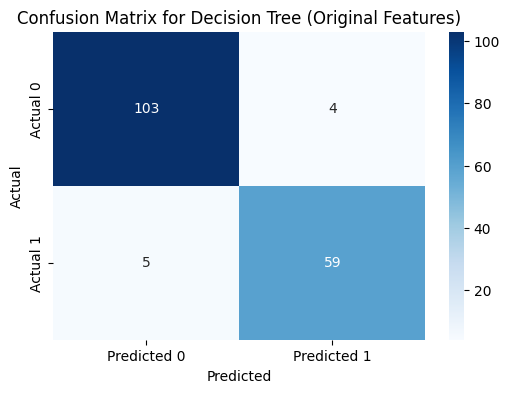

Classification Report for Decision Tree (Original Features):
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       107
           1       0.94      0.92      0.93        64

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171




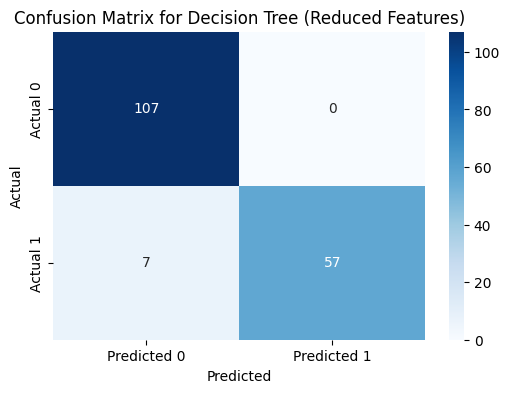

Classification Report for Decision Tree (Reduced Features):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       107
           1       1.00      0.89      0.94        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [ ]:
cm_dt_orig = confusion_matrix(test_target, best_decision_tree.predict(test_features))
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt_orig, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Decision Tree (Original Features)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("Classification Report for Decision Tree (Original Features):")
print(classification_report(test_target, best_decision_tree.predict(test_features)))
print()

cm_dt_corr = confusion_matrix(test_target_corr_fix, best_decision_tree_corr_fix.predict(test_features_corr_fix))
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt_corr, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Decision Tree (Reduced Features)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("Classification Report for Decision Tree (Reduced Features):")
print(classification_report(test_target_corr_fix, best_decision_tree_corr_fix.predict(test_features_corr_fix)))

- **Features Originais:** A matriz de confusão mostra que o modelo teve um bom desempenho, com poucos Falsos Positivos (FP) e Falsos Negativos (FN). O relatório de classificação confirma isso com altos valores para Precisão, Recall e F1-Score para ambas as classes.
- **Features Reduzidas:** A remoção de features correlacionadas resultou em um desempenho ligeiramente melhor para a Árvore de Decisão, com um aumento na acurácia e no F1-score, especialmente para a classe positiva (Maligno). Isso sugere que a remoção de redundância nos dados ajudou o modelo a generalizar melhor.

---

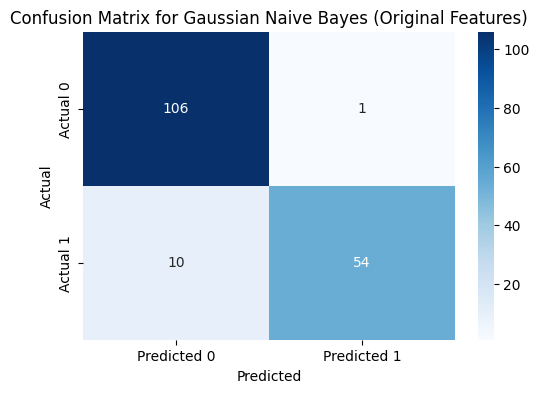

Classification Report for Gaussian Naive Bayes (Original Features):
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       107
           1       0.98      0.84      0.91        64

    accuracy                           0.94       171
   macro avg       0.95      0.92      0.93       171
weighted avg       0.94      0.94      0.93       171




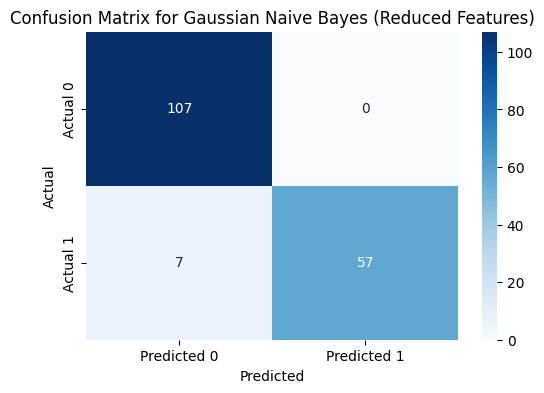

Classification Report for Gaussian Naive Bayes (Reduced Features):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       107
           1       1.00      0.89      0.94        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [ ]:
cm_gnb_orig = confusion_matrix(test_target, best_naive_bayes.predict(test_features))
plt.figure(figsize=(6, 4))
sns.heatmap(cm_gnb_orig, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Gaussian Naive Bayes (Original Features)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("Classification Report for Gaussian Naive Bayes (Original Features):")
print(classification_report(test_target, best_naive_bayes.predict(test_features)))
print()

cm_gnb_corr = confusion_matrix(test_target_corr_fix, best_naive_bayes_corr_fix.predict(test_features_corr_fix))
plt.figure(figsize=(6, 4))
sns.heatmap(cm_gnb_corr, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Gaussian Naive Bayes (Reduced Features)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("Classification Report for Gaussian Naive Bayes (Reduced Features):")
print(classification_report(test_target_corr_fix, best_naive_bayes_corr_fix.predict(test_features_corr_fix)))

- **Features Originais:** O Naive Bayes Gaussiano também apresentou um bom desempenho, com alta precisão para a classe positiva, mas um recall um pouco menor em comparação com a Árvore de Decisão.
- **Features Reduzidas:** O Naive Bayes Gaussiano teve uma melhora notável no desempenho com o dataset reduzido. A acurácia e o F1-score aumentaram, indicando que a suposição de independência das features no Naive Bayes foi beneficiada pela remoção de colunas altamente correlacionadas.

---

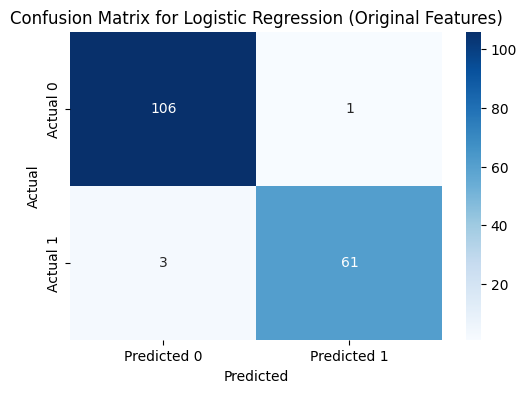

Classification Report for Logistic Regression (Original Features):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       107
           1       0.98      0.95      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171




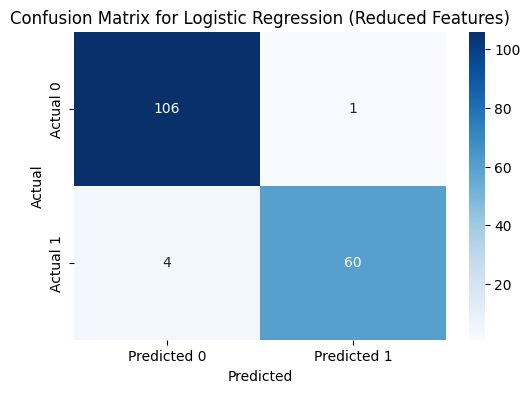

Classification Report for Logistic Regression (Reduced Features):
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       107
           1       0.98      0.94      0.96        64

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [ ]:
cm_lr_orig = confusion_matrix(test_target, best_logistic_regression.predict(normalized_test_features))
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr_orig, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Logistic Regression (Original Features)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("Classification Report for Logistic Regression (Original Features):")
print(classification_report(test_target, best_logistic_regression.predict(normalized_test_features)))
print()

cm_lr_corr = confusion_matrix(test_target_corr_fix, best_logistic_regression_corr_fix.predict(normalized_test_features_corr_fix))
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr_corr, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Logistic Regression (Reduced Features)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("Classification Report for Logistic Regression (Reduced Features):")
print(classification_report(test_target_corr_fix, best_logistic_regression_corr_fix.predict(normalized_test_features_corr_fix)))

- **Features Originais:** A Regressão Logística demonstrou um desempenho muito forte no dataset original, com altas métricas para ambas as classes. A matriz de confusão mostra um número muito baixo de erros de classificação.
- **Features Reduzidas:** Com as features reduzidas, a Regressão Logística manteve um desempenho robusto, embora com uma ligeira queda em algumas métricas em comparação com o dataset original. Isso pode indicar que, para a Regressão Logística, as features correlacionadas não foram um grande problema, ou que a remoção excessiva impactou ligeiramente a capacidade do modelo de capturar nuances nos dados.

---

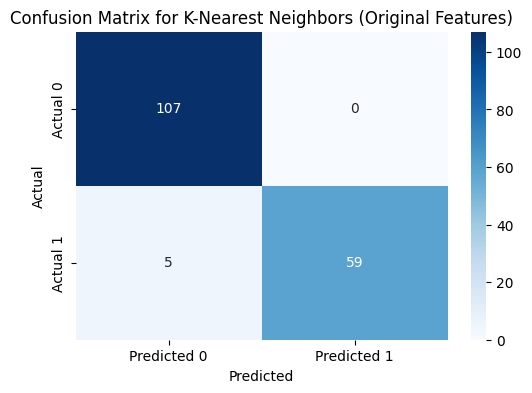

Classification Report for K-Nearest Neighbors (Original Features):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       1.00      0.92      0.96        64

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171




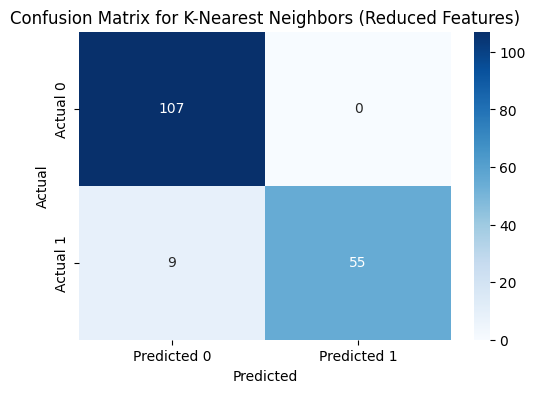

Classification Report for K-Nearest Neighbors (Reduced Features):
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       107
           1       1.00      0.86      0.92        64

    accuracy                           0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171



In [ ]:
cm_knn_orig = confusion_matrix(test_target, best_knn.predict(normalized_test_features))
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn_orig, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for K-Nearest Neighbors (Original Features)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("Classification Report for K-Nearest Neighbors (Original Features):")
print(classification_report(test_target, best_knn.predict(normalized_test_features)))
print()

cm_knn_corr = confusion_matrix(test_target_corr_fix, best_knn_corr_fix.predict(normalized_test_features_corr_fix))
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn_corr, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for K-Nearest Neighbors (Reduced Features)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("Classification Report for K-Nearest Neighbors (Reduced Features):")
print(classification_report(test_target_corr_fix, best_knn_corr_fix.predict(normalized_test_features_corr_fix)))

- **Features Originais:** O KNN com features originais também apresentou um desempenho excelente, com alta acurácia e F1-score.
- **Features Reduzidas:** No dataset reduzido, o desempenho do KNN teve uma pequena diminuição em comparação com o dataset original. Isso sugere que, para o KNN, que se baseia na proximidade no espaço de features, a remoção de algumas dimensões (mesmo que correlacionadas) pode ter impactado ligeiramente sua capacidade de encontrar os vizinhos mais próximos de forma ideal.


Com base nas métricas de avaliação no conjunto de teste, a **Regressão Logística** e o **K-Vizinhos** nos dados originais parecem ser os modelos com melhor desempenho para este problema. No entanto, a remoção de features correlacionadas beneficiou a **Árvore de Decisão** e o **Naive Bayes**, indicando que a multicolinearidade pode ter afetado o desempenho desses modelos no dataset original. A análise das curvas de aprendizagem na próxima seção fornecerá mais insights sobre a robustez e a capacidade de generalização de cada modelo com diferentes tamanhos de conjunto de treinamento.

---

### Curvas de Aprendizagem

As curvas de aprendizagem são ferramentas visuais que nos ajudam a entender como o desempenho de um modelo de aprendizado de máquina muda à medida que a quantidade de dados de treinamento aumenta. Elas geralmente plotam a métrica de desempenho (como acurácia, F1-score, etc.) em relação ao tamanho do conjunto de treinamento.

Ao plotar as curvas de aprendizagem para cada um dos modelos e para os dois conjuntos de features (original e com correlação removida), poderemos avaliar se os modelos se beneficiam de mais dados ou se já atingiram seu desempenho máximo com a quantidade de dados disponível. Isso também nos ajudará a comparar a robustez dos modelos e a influência da remoção de features altamente correlacionadas em seu aprendizado.

In [ ]:
train_test_split_ratios = np.arange(0.05, 1.0, 0.05)
print(train_test_split_ratios)

[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.75 0.8  0.85 0.9  0.95]


In [ ]:
metrics_original = {
    'DecisionTreeClassifier': {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1_score': []
    },
    'GaussianNB': {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1_score': []
    },
    'LogisticRegression': {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1_score': []
    },
    'KNeighborsClassifier': {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1_score': []
    }
}

metrics_corr_fix = {
    'DecisionTreeClassifier': {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1_score': []
    },
    'GaussianNB': {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1_score': []
    },
    'LogisticRegression': {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1_score': []
    },
    'KNeighborsClassifier': {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1_score': []
    }
}

models = {
    'DecisionTreeClassifier': DecisionTreeClassifier(**grid_decision_tree.best_params_),
    'GaussianNB': GaussianNB(**grid_naive_bayes.best_params_),
    'LogisticRegression': LogisticRegression(**grid_logistic_regression.best_params_),
    'KNeighborsClassifier': KNeighborsClassifier(**grid_knn.best_params_)
}

models_corr_fix = {
    'DecisionTreeClassifier': DecisionTreeClassifier(**best_decision_tree_corr_fix.get_params()),
    'GaussianNB': GaussianNB(**best_naive_bayes_corr_fix.get_params()),
    'LogisticRegression': LogisticRegression(**best_logistic_regression_corr_fix.get_params()),
    'KNeighborsClassifier': KNeighborsClassifier(**best_knn_corr_fix.get_params())
}

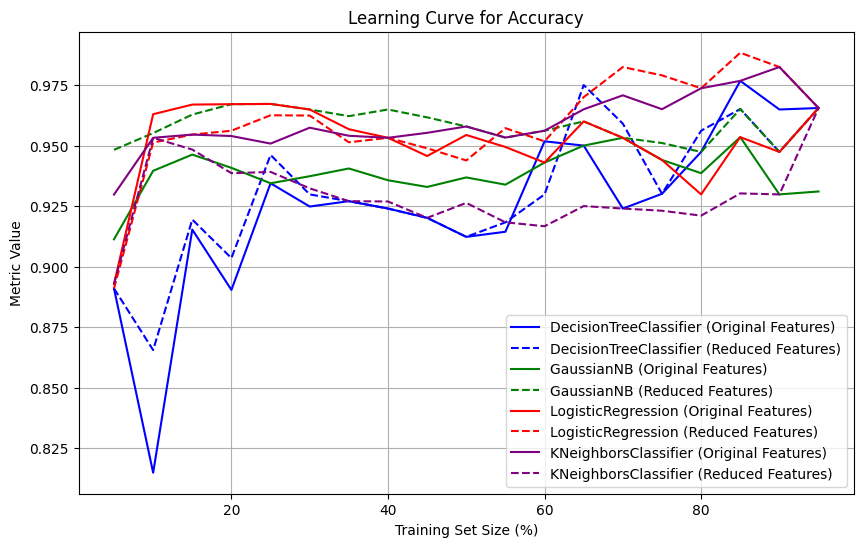

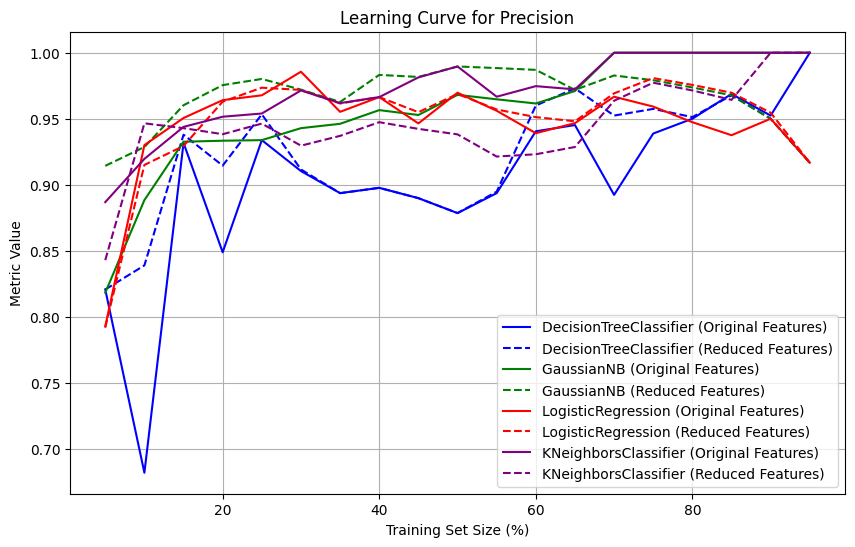

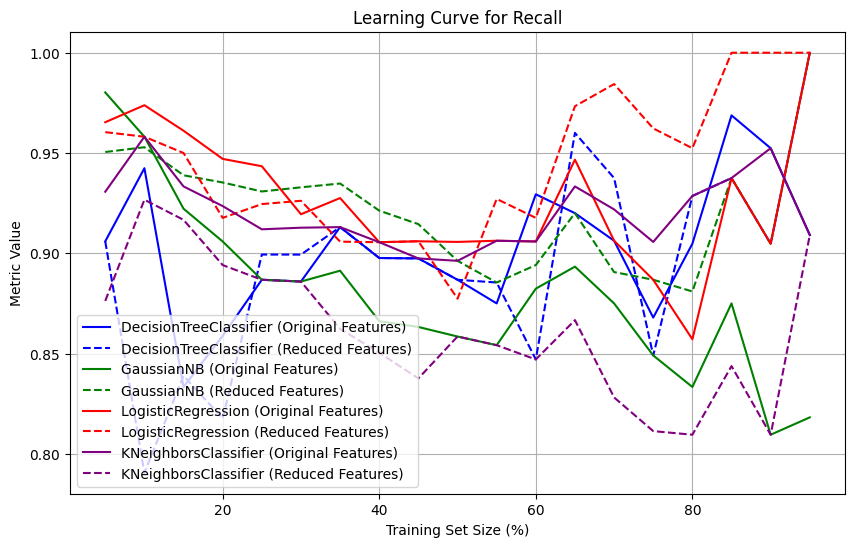

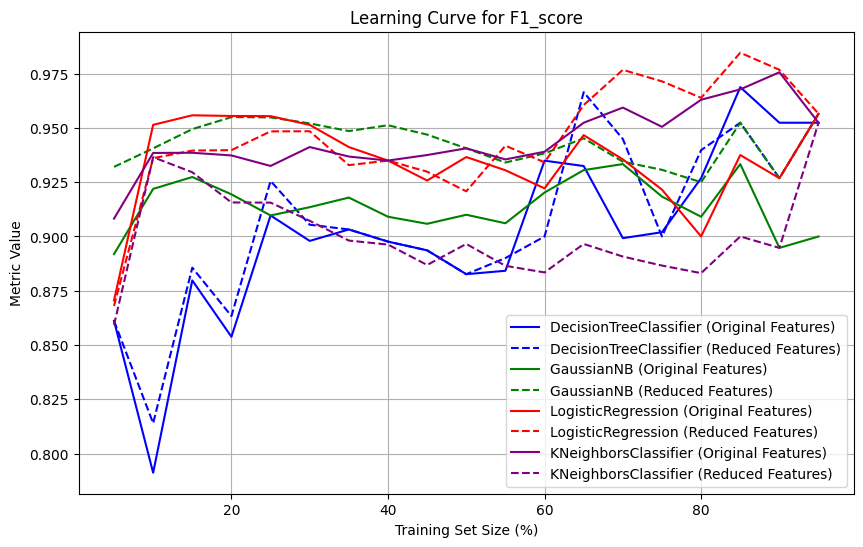

In [ ]:
for train_size in train_test_split_ratios:
    # Split data for original features
    X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
        features,
        numeric_target,
        train_size=train_size,
        random_state=random_seed,
        stratify=numeric_target
    )

    # Split data for correlation-fixed features
    X_train_corr, X_test_corr, y_train_corr, y_test_corr = train_test_split(
        features_corr_fix,
        numeric_target,
        train_size=train_size,
        random_state=random_seed,
        stratify=numeric_target
    )

    # Scale features for models that require it
    scaler = MinMaxScaler()

    X_train_orig_scaled = scaler.fit_transform(X_train_orig)
    X_test_orig_scaled = scaler.transform(X_test_orig)

    X_train_corr_scaled = scaler.fit_transform(X_train_corr)
    X_test_corr_scaled = scaler.transform(X_test_corr)

    # Train and evaluate models
    for name, model in models.items():
        # Original features
        if name in ['LogisticRegression', 'KNeighborsClassifier']:
            model.fit(X_train_orig_scaled, y_train_orig)
            predictions_original = model.predict(X_test_orig_scaled)
        else:
            model.fit(X_train_orig, y_train_orig)
            predictions_original = model.predict(X_test_orig)

        metrics_original[name]['accuracy'].append(accuracy_score(y_test_orig, predictions_original))
        metrics_original[name]['precision'].append(precision_score(y_test_orig, predictions_original))
        metrics_original[name]['recall'].append(recall_score(y_test_orig, predictions_original))
        metrics_original[name]['f1_score'].append(f1_score(y_test_orig, predictions_original))

    for name, model in models_corr_fix.items():
        # Correlation-fixed features
        if name in ['LogisticRegression', 'KNeighborsClassifier']:
            model.fit(X_train_corr_scaled, y_train_corr)
            predictions_corr_fix = model.predict(X_test_corr_scaled)
        else:
            model.fit(X_train_corr, y_train_corr)
            predictions_corr_fix = model.predict(X_test_corr)

        metrics_corr_fix[name]['accuracy'].append(accuracy_score(y_test_corr, predictions_corr_fix))
        metrics_corr_fix[name]['precision'].append(precision_score(y_test_corr, predictions_corr_fix))
        metrics_corr_fix[name]['recall'].append(recall_score(y_test_corr, predictions_corr_fix))
        metrics_corr_fix[name]['f1_score'].append(f1_score(y_test_corr, predictions_corr_fix))


metric_names = ['accuracy', 'precision', 'recall', 'f1_score']
model_names = ['DecisionTreeClassifier', 'GaussianNB', 'LogisticRegression', 'KNeighborsClassifier']

# Define a list of colors for each model
colors = ['blue', 'green', 'red', 'purple']

for metric_name in metric_names:
    plt.figure(figsize=(10, 6))
    for i, model_name in enumerate(model_names):
        # Plot original features with solid line
        plt.plot(train_test_split_ratios * 100, metrics_original[model_name][metric_name], label=f'{model_name} (Original Features)', color=colors[i], linestyle='-')
        # Plot reduced features with dashed line
        plt.plot(train_test_split_ratios * 100, metrics_corr_fix[model_name][metric_name], label=f'{model_name} (Reduced Features)', color=colors[i], linestyle='--')

    plt.title(f'Learning Curve for {metric_name.capitalize()}')
    plt.xlabel('Training Set Size (%)')
    plt.ylabel('Metric Value')
    plt.legend()
    plt.grid(True)
    plt.show()

As curvas de aprendizagem fornecem insights valiosos sobre como cada modelo se comporta com diferentes quantidades de dados de treinamento e o impacto da remoção de features correlacionadas.

A análise das curvas de aprendizagem sugere que, com o dataset original, a Regressão Logística e o KNN são os modelos mais promissores, alcançando alto desempenho com a quantidade de dados disponível, mesmo que apenas uma fração.
Com o dataset reduzido, a Árvore de Decisão e o Naive Bayes apresentam uma melhora notável. A escolha final do melhor modelo dependerá dos requisitos específicos do problema e da importância relativa de cada métrica de avaliação.

No geral, a maioria as métricas e modelos apresentaram uma performance melhorada com o crescimento do dataset, atingindo um certo plateau após o uso de 20% do dataset para treino. Contudo, vale salientar que o conjunto é muito pequeno e isso pode gerar ruídos na construção da curva.

---

## Referências

Wolberg, W., Mangasarian, O., Street, N., & Street, W. (1993). Breast Cancer Wisconsin (Diagnostic) [Dados]. UCI Machine Learning Repository. https://doi.org/10.24432/C5DW2B

Bennett, K. P., & Mangasarian, O. L. (1992). Decision Tree Construction via Linear Programming. Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, 97–101. https://doi.org/10.24432/C5GK50

Cleveland Clinic. (2023, outubro 12). Fine‑Needle Aspiration (FNA). My.ClevelandClinic.org. Recuperado em 20 junho 2025, de https://my.clevelandclinic.org/health/diagnostics/17872-fine-needle-aspiration-fna

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M., & Duchesnay, É. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, 2825–2830. https://jmlr.org/papers/v12/pedregosa11a.html